## AUTO1 Challenge

> Please take a look at the following dataset and answer the following questions:
https://archive.ics.uci.edu/ml/datasets/Automobile

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/imports-85.data', header=None, na_values='?')
data.columns = ['symboling', 
    'normalized-losses', 
    'make', 
    'fuel-type', 
    'aspiration', 
    'num-of-doors', 
    'body-style', 
    'drive-wheels', 
    'engine-location', 
    'wheel-base', 
    'length', 
    'width', 
    'height', 
    'curb-weight', 
    'engine-type', 
    'num-of-cylinders', 
    'engine-size', 
    'fuel-system', 
    'bore', 
    'stroke', 
    'compression-ratio', 
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price']
data.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [3]:
data.shape

(205, 26)

### Question 1 (10 Points)

> List as many use cases for the dataset as possible.

* Predicting the price of the car
* Analyzing which features of a car drive the price higher
* Predicting the risk factor of the car for insurance purposes
* Analyzing which car represents the best deal considering its price and its possible insurance policy premium

### Question 2 (10 Points)

> Auto1 has a similar dataset (yet much larger...). 
> Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve Auto1's business.

Predicting the price of the car could be used in different ways:
* Estimating the price in second hand deals with customers
* Estimating the price of competitor's cars based on its features

### Question 3 (10 Points)

> Implement the model you described in question 2 in R or Python. The code has to retrieve the
data, train and test a statistical model, and report relevant performance criteria.

#### EDA

<AxesSubplot:>

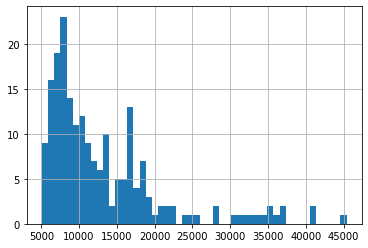

In [4]:
data['price'].hist(bins=50)

<AxesSubplot:>

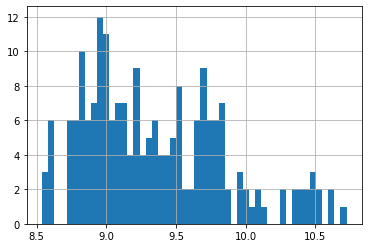

In [5]:
np.log(data['price']).hist(bins=50)

#### Feature engineering

In [6]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Boolean and casting of numerical variables

In [7]:
data['is_gas'] = np.where(data['fuel-type'] == 'gas', 1, 0)
data['is_four_doors'] = np.where(data['num-of-doors'] == 'two', 0, 1)
data['cylinders_number'] = data['num-of-cylinders'].map({
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12
})

In [8]:
features = ['engine-size', 'horsepower', 'highway-mpg', 'curb-weight', 'symboling', 'normalized-losses']
target = 'price'

One hot encoding

In [9]:
body_styles = pd.get_dummies(data['body-style'])
features += list(body_styles.columns)
data = pd.concat([data, body_styles], axis=1)

In [10]:
makes = pd.get_dummies(data['make'])
features += list(makes.columns)
data = pd.concat([data, makes], axis=1)

#### Splits

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data = data.dropna(subset=[target])

In [13]:
X = data[features]
y = data[target]

Normalization

In [14]:
X = X/X.max()

Spliting dataset into train 75 / validation 15 / test 10

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, random_state=1) # 0.25 x 0.8 = 0.2

Log transform since prices are rightly skewed

In [16]:
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

#### Fillna

In [17]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer

In [18]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='median')),
    ])
transformer = make_pipeline(transformer)
transformer = transformer.fit(X_train, y_train)

#### Training

Training of a OLS model

In [19]:
from sklearn.linear_model import LinearRegression, Lasso

In [20]:
model = LinearRegression()
model.fit(transformer.transform(X_train), y_train)

LinearRegression()

In [21]:
y_pred = model.predict(transformer.transform(X_val))

Model coeficients interpretation

In [22]:
from matplotlib import pyplot as plt

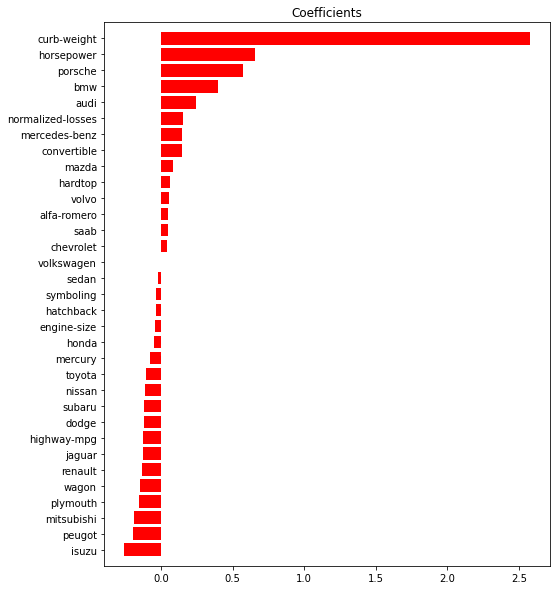

In [23]:
coef = model.coef_
features = np.array(features)[coef != 0.0]
coef = coef[coef != 0]
coef_idx = np.argsort(coef)

plt.figure(figsize=(8, 10))
plt.title("Coefficients")
coef_num = range(len(coef))
plt.barh(coef_num, coef[coef_idx], color="r", align="center")

plt.yticks(coef_num, features[coef_idx])
plt.ylim([-1, len(features)])

plt.show()

#### Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def acper(y_true, y_pred, threshold=.05):
    results = []
    for current_true, current_pred in zip(y_true, y_pred):
        delta = current_true*threshold
        results.append((current_true-delta) <= current_pred <= (current_true+delta))
    return sum(results) / len(results)

Baseline errors

In [43]:
mean_absolute_error(y_val, np.log([data['price'].mean()]*len(y_pred)))

0.4224830279713316

In [44]:
acper(y_val, np.log([data['price'].mean()]*len(y_pred)))

0.6333333333333333

Linear model errors

In [40]:
mean_absolute_error(y_val, y_pred)

0.092457886397477

In [42]:
rmse(y_val, y_pred)

0.11766758631244437

In [32]:
acper(y_val, y_pred)

1.0

Linear model inverse log transform

In [26]:
mean_absolute_error(np.exp(y_val), np.exp(y_pred))

1156.5984283956952

In [29]:
rmse(np.exp(y_val), np.exp(y_pred))

1611.7693030830715

In [33]:
acper(np.exp(y_val), np.exp(y_pred))

0.26666666666666666

Test set errors

In [49]:
y_test_pred = model.predict(transformer.transform(X_test))

In [51]:
mean_absolute_error(np.exp(y_test), np.exp(y_test_pred))

1644.2197044405282

In [52]:
rmse(np.exp(y_test), np.exp(y_test_pred))

2067.810458540348

In [53]:
acper(np.exp(y_test), np.exp(y_test_pred))

0.23809523809523808

#### Error analysis

Sorting the validation predictions from most different to least different

In [35]:
errors = pd.DataFrame({'y_val': np.exp(y_val), 'y_pred': np.exp(y_pred)})
errors['diff'] = abs(1-errors['y_pred'] / errors['y_val'])

In [39]:
errors.sort_values(by='diff', ascending=False).join(data).head(10).T

,167,59,125,115,30,176,203,149,19,20
y_val,8449,8845,22018,16630,6479,10898,22470,11694,6295,6575
y_pred,11933.2,11003.1,27135.4,14206.2,5557.47,9417.7,19626.2,10233.8,7074.2,7338.02
diff,0.412377,0.243991,0.232419,0.145749,0.142233,0.135832,0.126559,0.124865,0.123781,0.116049
symboling,2,1,3,0,2,-1,-1,0,1,0
normalized-losses,134,129,186,161,137,65,95,85,98,81
make,toyota,mazda,porsche,peugot,honda,toyota,volvo,subaru,chevrolet,chevrolet
fuel-type,gas,gas,gas,gas,gas,gas,diesel,gas,gas,gas
aspiration,std,std,std,std,std,std,turbo,turbo,std,std
num-of-doors,two,two,two,four,two,four,four,four,two,four
body-style,hardtop,hatchback,hatchback,sedan,hatchback,sedan,sedan,wagon,hatchback,sedan


### Question 4 (70 Points)

> A. Explain each and every of your design choices (e.g., preprocessing, model selection, hyper
parameters, evaluation criteria). Compare and contrast your choices with alternative
methodologies.

* Preprocessing
 * Creation of one hot encoded variables for most relevant features (car manufacturer and type)
 * Normalization of relevant numerical variables selected based on their correlation with target variable
 * Log transformation of target variable since it's highly skewed
* Model selection
 * Use of a simple linear model due to the dataset size
* Evaluation criteria
 * MAE for lack of outliers
 * ACPER (almost correct prediction error)
 * Squared root MSE

> B. Describe how you would improve the model in Question 3 if you had more time.

* Statistical confidence intervals
* Analysis of errors with different business costs (false higher prices, false lower prices)
* Non linear models
* Perform regularization L1 or L2